In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import linalg

In [9]:
t = 1.0
eps = 3.0
N = 18
column = np.zeros(N)
column[0] = eps
column[1] = t
column[-1] = t
C = linalg.circulant(column)

[[ 3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.

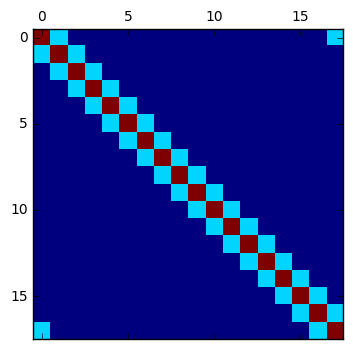

In [41]:
print(C)
plt.matshow(C)

Note that the matrix is Hermitian (a property of a good Hamiltonian)

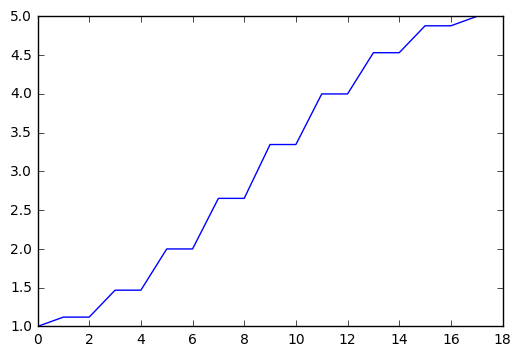

In [13]:
energies = linalg.eigvalsh(C)
plt.plot(energies)

Definition of scipy fft: y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()

/usr/local/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


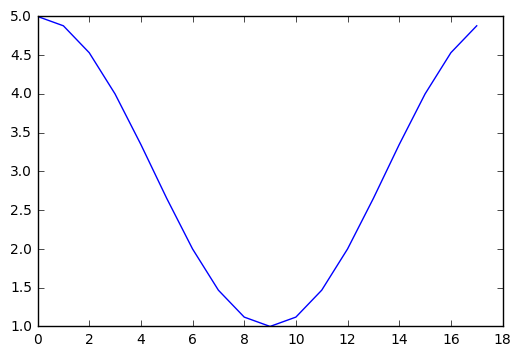

In [14]:
from scipy.fftpack import fft, ifft
spectrum = fft(column)
plt.plot(spectrum)

In [17]:
Ctilde =  ifft(fft(C, axis = 1), axis = 0)
low_values_indices = Ctilde < 0.001  # Where values are low
Ctilde[low_values_indices] = 0

In [18]:
print(Ctilde)

[[ 5.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j]
 [ 0.00000000 +0.00000000e+00j  4.87938524 -2.59052039e-16j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000

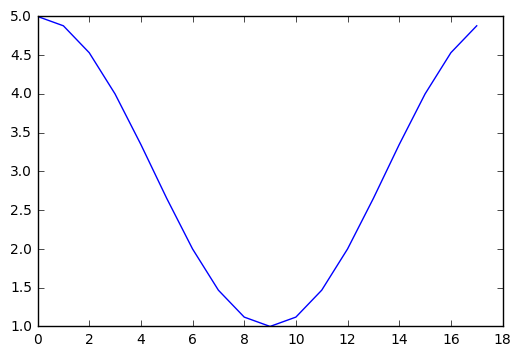

In [21]:
plt.plot(np.real(np.diagonal(Ctilde)))

In [30]:
t1 = 1.0
t2 = 2.2
e1 = 1.0
e2 = 3.4
N = 8
T = np.array([[0,t2],
              [0,0]])
E = np.array([[e1,t1],
              [t1, e2]])

column = np.zeros(N)
column[1] = 1

offdiag = np.kron(linalg.circulant(column), T)
H = offdiag + np.kron(np.eye(N), E) + np.conj(np.transpose(offdiag))

[[ 1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   2.2]
 [ 1.   3.4  2.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   2.2  1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   1.   3.4  2.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   2.2  1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   1.   3.4  2.2  0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   2.2  1.   1.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.   3.4  2.2  0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   2.2  1.   1.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1.   3.4  2.2  0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   2.2  1.   1.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   3.4  2.2  0.   0.


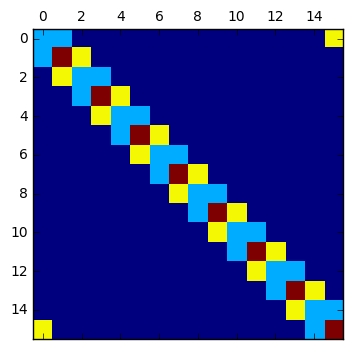

In [42]:
print(H)
plt.matshow(H)

[[  5.40000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   -1.20000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j]
 [  0.00000000e+00 +0.00000000e+00j   5.15641450e+00 +5.55111512e-17j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -8.32667268e-17 -5.55111512e-17j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -1.20000000e+00 -4.59220119e-01j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 

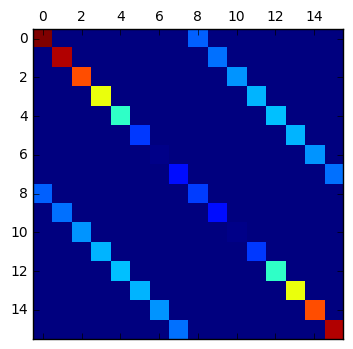

In [38]:
Htilde =  ifft(fft(H, axis = 1), axis = 0)
print(Htilde)
plt.matshow(np.abs(Htilde))

Dimerization Makes this not diagonal anymore.

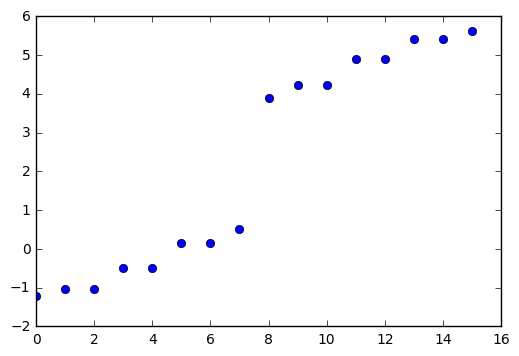

In [36]:
energies = linalg.eigvalsh(H)
plt.plot(energies, 'bo')

This jump in energies is the band gap

In [39]:
def Hk(k):
    a = 1.0
    return T*np.exp(-1.j * k * a ) + E + np.conj(np.transpose(T)) * np.exp(1.j * k * a )

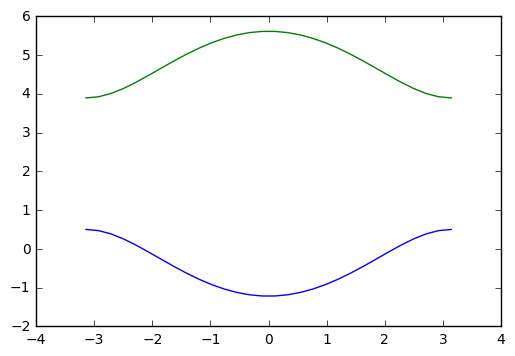

In [40]:
ks = np.linspace(-1 * np.pi, np.pi, 30)
energies = np.zeros((30, 2))
for i in range(30):
    energies[i,:] = linalg.eigvalsh(Hk(ks[i]))
plt.plot(ks,energies[:,0])
plt.plot(ks,energies[:,1])